In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
iris = pd.read_excel('iris.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.count()

SL                150
SW                150
PL                150
PW                150
Classification    150
dtype: int64

In [7]:
iris.shape

(150, 5)

In [8]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
iris.sample(10)

,SL,SW,PL,PW,Classification
116,6.5,3.0,5.5,1.8,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [12]:
iris.isnull()

,SL,SW,PL,PW,Classification
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


**Exploratory Data Analysis**

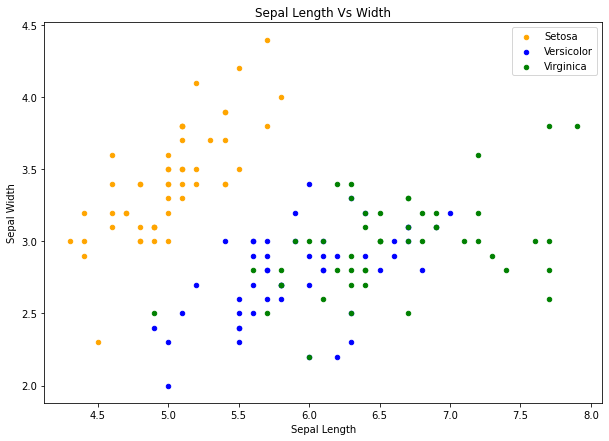

In [13]:
fig = iris[iris.Classification == 'Iris-setosa'].plot(kind='scatter', x='SL', y='SW', color='orange', label='Setosa')
iris[iris.Classification == 'Iris-versicolor'].plot(kind='scatter', x='SL', y='SW', color='blue', label='Versicolor', ax=fig)
iris[iris.Classification == 'Iris-virginica'].plot(kind='scatter', x='SL', y='SW', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

C:\Users\lijis\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


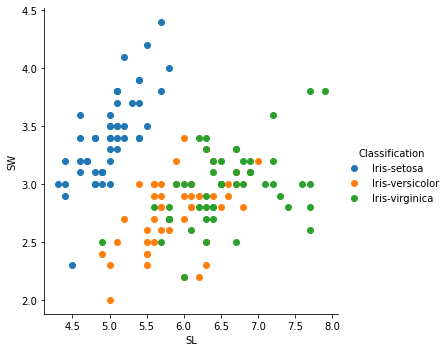

In [14]:
sns.FacetGrid(iris, hue='Classification', size=5)\
   .map(plt.scatter, 'SL', 'SW')\
   .add_legend()

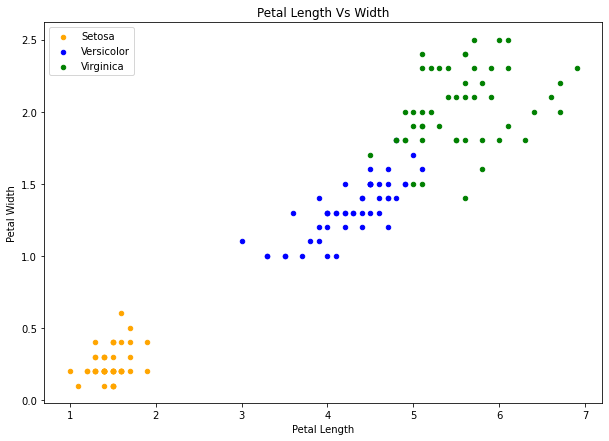

In [15]:
fig = iris[iris.Classification == 'Iris-setosa'].plot(kind='scatter', x='PL', y='PW', color='orange', label='Setosa')
iris[iris.Classification == 'Iris-versicolor'].plot(kind='scatter', x='PL', y='PW', color='blue', label='Versicolor', ax=fig)
iris[iris.Classification == 'Iris-virginica'].plot(kind='scatter', x='PL', y='PW', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


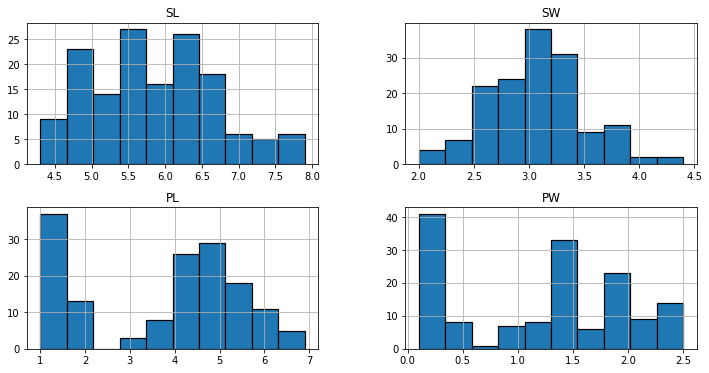

In [16]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Classification', ylabel='PW'>

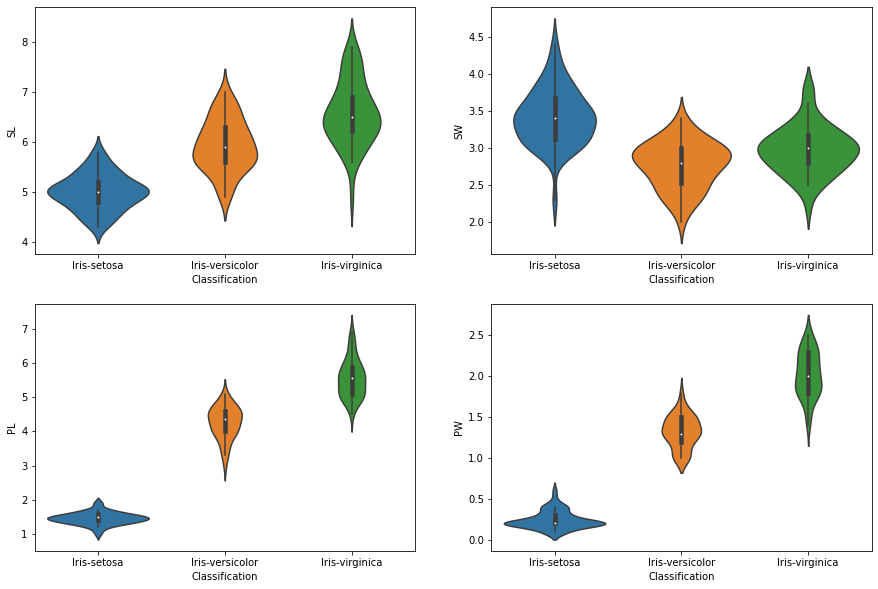

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Classification', y = 'SL', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Classification', y = 'SW', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Classification', y = 'PL', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Classification', y = 'PW', data=iris)

In [18]:
from sklearn import svm # for SVM Algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train, test = train_test_split(iris, test_size=0.3) 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [19]:
train_X = train[['SL','SW','PL','PW']] 
train_y = train.Classification # output of the training data

test_X = test[['SL','SW','PL','PW']] # taking test data feature
test_y = test.Classification # output value of the test data
train_X.head()

,SL,SW,PL,PW
88,5.6,3.0,4.1,1.3
109,7.2,3.6,6.1,2.5
94,5.6,2.7,4.2,1.3
58,6.6,2.9,4.6,1.3
132,6.4,2.8,5.6,2.2


In [20]:
test_X.head()

,SL,SW,PL,PW
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
30,4.8,3.1,1.6,0.2
134,6.1,2.6,5.6,1.4
20,5.4,3.4,1.7,0.2


In [21]:
train_y.head()

88     Iris-versicolor
109     Iris-virginica
94     Iris-versicolor
58     Iris-versicolor
132     Iris-virginica
Name: Classification, dtype: object

**Decision Tree**

In [22]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))
print('The confusion matrix for decision tree is: ',metrics.confusion_matrix(prediction,test_y))
print('The classification matrix for decision tree is: ',metrics.classification_report(test_y,prediction))

The accuracy of Decision Tree is:  0.9111111111111111
The confusion matrix for decision tree is:  [[16  0  0]
 [ 0 15  2]
 [ 0  2 10]]
The classification matrix for decision tree is:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.88      0.88        17
 Iris-virginica       0.83      0.83      0.83        12

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



***Logistic Regression***

In [23]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))
print('The confusion matrix for decision tree is: ',metrics.confusion_matrix(prediction,test_y))
print('The classification matrix for decision tree is: ',metrics.classification_report(test_y,prediction))

The accuracy of Decision Tree is:  0.9333333333333333
The confusion matrix for decision tree is:  [[16  0  0]
 [ 0 15  1]
 [ 0  2 11]]
The classification matrix for decision tree is:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.85      0.92      0.88        12

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

